In [1]:
### This began with a great head start from Johnowhitaker:
### https://zindi.africa/competitions/fowl-escapades/discussions/675

In [2]:
### And the first serious attempt to ensure I can reproduce identical results with a FastAI model & notebook
### the jupyter notebook was started with this command:
### env PYTHONHASHSEED=42 jupyter notebook
### per this FastAI thread: 
### https://forums.fast.ai/t/solved-reproducibility-where-is-the-randomness-coming-in/31628/15

In [3]:
### next step in reproducibility is to set up the various seeds within the notebook
### and this will need to be called:
###  You have to run random_seed(0), before the first fit;
###  You have to run it before creating the databunch;
###  And you have to call it every time for each different time you call fit.

def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [4]:
!ls

blend_f18f.csv			      fastai_v7.csv
blend_f18f_v2.csv		      five-sec-samples.ipynb
blend_f18f_v3.csv		      models
blend.R				      repro-fowl-A17a.ipynb
blend_v6_v7.csv			      repro-fowl-A17a-v2.ipynb
colab-follow-along.ipynb	      repro-fowl-data-creation.ipynb
colab-improve-try1.ipynb	      Rsplits
colab-improve-try2.ipynb	      Rsplits_Test
colab-improve-try3-rn34.ipynb	      Rsplits_Train
colab-improve-try4-rn50.ipynb	      R_splitter.R
colab-improve-try5-rn50v2.ipynb       SampleSubmission.csv
colab-improve-try6-densenet201.ipynb  splits_max_prob_row.csv
day1.R				      StarterNotebook.ipynb
default_plus_WBSR.csv		      Test
default_sub.csv			      Test.csv
fastai_A17a.csv			      TestSplits.csv
fastai_f18c.csv			      Test_Wavs
fastai_f18d.csv			      Test.zip
fastai_f18e.csv			      Train
fastai_f18f.csv			      Train.csv
fastai_follow_along.csv		      Train_Cuts
fastai_splits_v1.csv		      train_rates.csv
fastai_v2.csv			      TrainSplits.csv
fastai_v3.csv			      Train_Wav

In [5]:
import pandas as pd
sub = pd.read_csv('SampleSubmission.csv')
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train = pd.read_csv('Train.csv')
train.head()

,ID,common_name
0,MBMG2C,Ring-necked Dove
1,K8LJSB,Ring-necked Dove
2,OGD9L6,Ring-necked Dove
3,581PCQ,Ring-necked Dove
4,P91M1F,Ring-necked Dove


In [7]:
birds = sub.columns[1:]
birds

Index(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark', 'Eastern Clapper Lark',
       'Rufous-naped Lark', 'Dark-capped Bulbul', 'Sombre Greenbul',
       'Long-billed Crombec', 'African Reed Warbler', 'Rattling Cisticola',
       'Levaillants Cisticola', 'Tawny-flanked Prinia', 'Karoo Prinia',
       'Bar-throated Apalis', 'Green-backed Camaroptera',
       'Chestnut-vented Warbler', 'Cape White-eye', 'Karoo Scrub Robin',
       'White-browed Scrub Robin', 'Cape Robin-Chat',
       'White-browed Robin-Chat', 'Chorister Robin-Chat',
       'Southern Double-collared Sunbird', 'White-bellied Sunbird',
       'African Pipit', 'African Rock Pipit', 'Cape Bunting'],
      d

In [8]:
# Add file names
train['file_name'] = 'Train/'+train['ID']+'.mp3'
sub['file_name'] = 'Test/'+sub['ID']+'.mp3'

In [9]:
import IPython.display as ipd
from matplotlib import pyplot as plt
import librosa

In [10]:
# Checking that the spectrograms were generated successfully:
import glob
ims = glob.glob('Train/*.png')
train['img_path'] = train['file_name'].str[:-4]+'.png'
print(len(ims), len(train))

1857 1857


In [11]:
# Similarly, test now has rows for files that have had spectrograms created.
sub['img_path'] = sub['file_name'].str[:-4]+'.png'
ims = glob.glob('Test/*.png')
test = sub.loc[sub.img_path.isin(ims)]
print(len(sub), len(test))

911 911


In [12]:
from fastai.vision import *

In [13]:
random_seed(42,use_cuda=True)

data = ImageDataBunch.from_df(path="./", df=train[["img_path", "common_name"]], ds_tfms=get_transforms(), size=224, num_workers=0)\
  .split_by_rand_pct(seed=42)\
  .label_from_df(cols='common_name')\
  .databunch(bs=16)\
  .normalize(imagenet_stats)

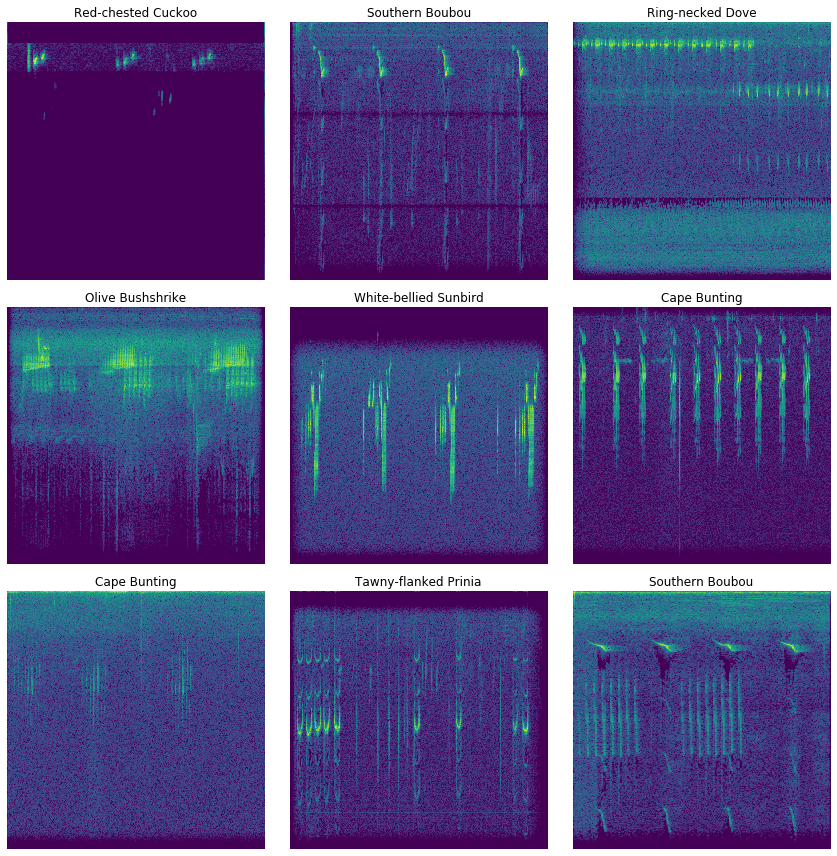

In [14]:
data.show_batch(rows=3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


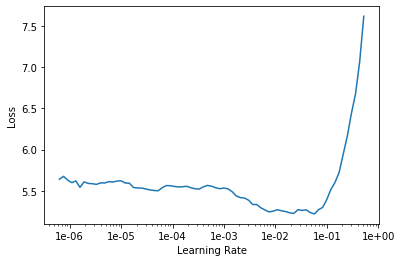

In [15]:
# Going to set this a lot
random_seed(42,use_cuda=True)

# Create a learner and pick a learning rate
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy, top_k_accuracy])
learn.lr_find()
learn.recorder.plot()

In [16]:
# Going to set this a lot
random_seed(42,use_cuda=True)

# Train the head of the model
learn.fit_one_cycle(4, 5e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,6.330528,7.351180,0.959596,0.040404,0.158249,00:31
1,4.928490,3.677606,0.892256,0.107744,0.343434,00:31
2,3.911447,2.897140,0.787879,0.212121,0.535354,00:31
3,3.122512,2.569606,0.727273,0.272727,0.676768,00:31


In [17]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.633103,2.560935,0.700337,0.299663,0.612795,00:31
1,2.425350,2.497713,0.673401,0.326599,0.680135,00:32
2,1.984189,1.995565,0.582492,0.417508,0.791246,00:31
3,1.853558,1.882752,0.552189,0.447811,0.808081,00:31


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


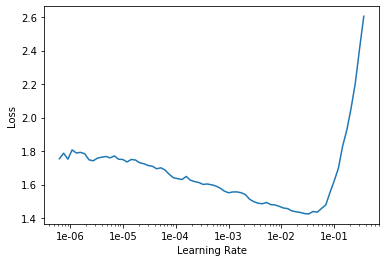

In [18]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.lr_find()
learn.recorder.plot()

In [19]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,1.338943,1.797349,0.528620,0.471380,0.831650,00:31
1,0.775397,1.791933,0.511784,0.488215,0.811448,00:31
2,0.565770,1.730569,0.498316,0.501683,0.808081,00:31
3,1.139266,1.739152,0.494949,0.505050,0.824916,00:31


In [20]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.897750,1.726340,0.505050,0.494949,0.828283,00:31
1,0.426602,1.732087,0.491582,0.508417,0.818182,00:31
2,0.360189,1.710208,0.494949,0.505050,0.818182,00:31
3,1.041680,1.727770,0.488215,0.511784,0.824916,00:33


In [21]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(4, 1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.845706,1.719907,0.501683,0.498316,0.828283,00:32
1,0.394158,1.729140,0.488215,0.511784,0.818182,00:31
2,0.341377,1.708553,0.494949,0.505050,0.818182,00:32
3,1.032173,1.726693,0.488215,0.511784,0.824916,00:31


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


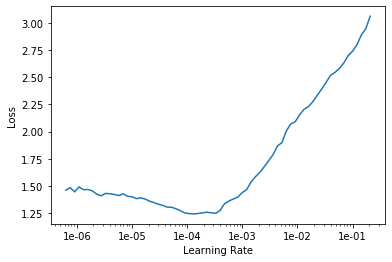

In [22]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [23]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(4, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.840709,1.713017,0.494949,0.505050,0.838384,00:41
1,0.389768,1.725202,0.498316,0.501683,0.818182,00:42
2,0.339119,1.698839,0.491582,0.508417,0.821549,00:42
3,1.009256,1.717202,0.491582,0.508417,0.821549,00:41


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


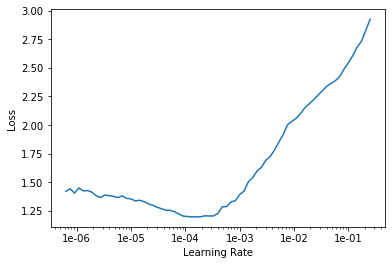

In [24]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.lr_find()
learn.recorder.plot()

In [25]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(4, slice(5e-7, 5e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.795172,1.696700,0.488215,0.511784,0.838384,00:42
1,0.359891,1.712142,0.488215,0.511784,0.821549,00:41
2,0.315210,1.685853,0.491582,0.508417,0.831650,00:42
3,0.962087,1.704757,0.494949,0.505050,0.828283,00:42


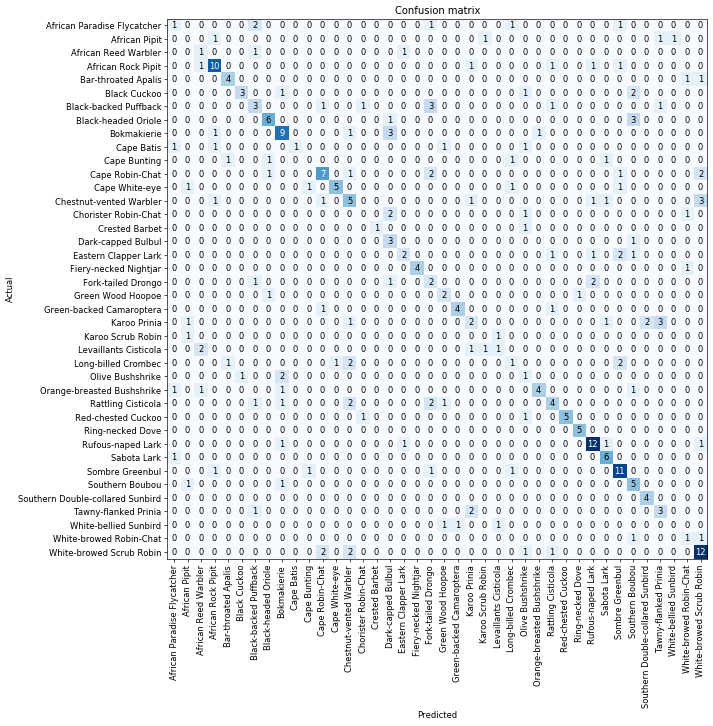

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
# Going to set this a lot
random_seed(42,use_cuda=True)

# Add the test data as a test set for the model
src = (ImageList.from_df(path='./', df=test, cols='img_path')) # Note test, not sub, as we only have spectrograms for the ims in test
learn.data.add_test(src)

In [28]:
# Get predictions
preds, y = learn.get_preds(DatasetType.Test)

In [29]:
# Add preds to test
test = test.copy()
for b in birds:
  test[b] = preds[:,learn.data.classes.index(b)]
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,0.000172,0.002397,0.007411,0.488643,0.000091,0.000211,0.003365,0.018565,0.035133,...,0.000001,0.117667,0.002176,0.000008,0.000001,0.000001,0.000096,0.000032,Test/019OYB.mp3,Test/019OYB.png
1,01S9OX,0.000046,0.000462,0.000980,0.003181,0.000732,0.000228,0.066188,0.039241,0.006781,...,0.025585,0.026869,0.097484,0.000462,0.000294,0.000457,0.022289,0.002418,Test/01S9OX.mp3,Test/01S9OX.png
2,02CS12,0.006873,0.004872,0.000372,0.014106,0.047967,0.002682,0.002572,0.024827,0.006081,...,0.002202,0.004417,0.004314,0.015071,0.003169,0.005472,0.048561,0.109889,Test/02CS12.mp3,Test/02CS12.png
3,02LM3W,0.011283,0.020549,0.122002,0.003150,0.077334,0.005210,0.007208,0.065842,0.005736,...,0.011809,0.004806,0.045835,0.000264,0.000360,0.000275,0.000098,0.000165,Test/02LM3W.mp3,Test/02LM3W.png
4,0C3A2V,0.001149,0.001340,0.000795,0.001024,0.049155,0.001768,0.023798,0.112805,0.002605,...,0.061922,0.031156,0.017776,0.005510,0.004525,0.002038,0.007967,0.000390,Test/0C3A2V.mp3,Test/0C3A2V.png


In [30]:
# Merge back into submission DF, adding a low prob prediction for rows where we had no image generated
cols = ['ID']
for b in birds:
  cols.append(b)
ss = pd.merge(sub['ID'], test[cols], on='ID', how='left' )
ss = ss.fillna(1/40) # For those with NaNs (if you only generated spectrograms for a subset of the test mp3s)
ss.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0.000172,0.002397,0.007411,0.488643,0.000091,0.000211,0.003365,0.018565,0.035133,...,3.271793e-07,0.000311,0.000001,0.117667,0.002176,0.000008,0.000001,0.000001,0.000096,0.000032
1,01S9OX,0.000046,0.000462,0.000980,0.003181,0.000732,0.000228,0.066188,0.039241,0.006781,...,3.337339e-04,0.058503,0.025585,0.026869,0.097484,0.000462,0.000294,0.000457,0.022289,0.002418
2,02CS12,0.006873,0.004872,0.000372,0.014106,0.047967,0.002682,0.002572,0.024827,0.006081,...,3.409509e-03,0.003950,0.002202,0.004417,0.004314,0.015071,0.003169,0.005472,0.048561,0.109889
3,02LM3W,0.011283,0.020549,0.122002,0.003150,0.077334,0.005210,0.007208,0.065842,0.005736,...,1.397508e-04,0.002584,0.011809,0.004806,0.045835,0.000264,0.000360,0.000275,0.000098,0.000165
4,0C3A2V,0.001149,0.001340,0.000795,0.001024,0.049155,0.001768,0.023798,0.112805,0.002605,...,1.554618e-03,0.002397,0.061922,0.031156,0.017776,0.005510,0.004525,0.002038,0.007967,0.000390


In [31]:
# Check shape
ss.shape

(911, 41)

In [32]:
# Save predictions
ss.to_csv('fastai_A17av2.csv', index=False)

# Save model
learn.save('model-A17av2')

In [33]:
# LB Score v6: 1.55 (val loss 1.73)
# LB Score v7: 1.698 (val loss 1.71, but lower class accuracy)